# Decision Tree

In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data/Real-Data/Real_Combine.csv')
df.head()

,T,TM,SLP,H,W,V,VM,PM 2.5
0,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [3]:
# Splitting into independent and dependent

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [4]:
y.isnull().sum()

2

In [5]:
## Replacing the null values with median
y.fillna(y.median(),inplace=True)

In [6]:
### Train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [7]:
### Model development

In [8]:
from sklearn.tree import DecisionTreeRegressor

dtree=DecisionTreeRegressor(criterion='mse')

In [9]:
dtree.fit(X_train,y_train)

C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse')

In [10]:
print('coefficient r^2: {}'.format(dtree.score(X_train,y_train)))

coefficient r^2: 1.0


In [11]:
print('codefficient r^2 on test: {}'.format(dtree.score(X_test,y_test)))

codefficient r^2 on test: 0.3016245038383578


In [12]:
### Cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)
score.mean()

C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users

0.020306566233076605

In [13]:
## Tree visualization

from sklearn import tree

In [14]:
features=list(df.columns[:-1])
features

['T', 'TM', 'SLP', 'H', 'W', 'V', 'VM']

[Text(0.499622216861434, 0.9772727272727273, 'X[2] <= 1011.15\nmse = 6559.392\nsamples = 763\nvalue = 110.648'),
 Text(0.19953594989532833, 0.9318181818181818, 'X[1] <= 20.65\nmse = 1789.906\nsamples = 437\nvalue = 65.093'),
 Text(0.05896870868223887, 0.8863636363636364, 'X[4] <= 1.1\nmse = 2765.65\nsamples = 63\nvalue = 101.475'),
 Text(0.05755839576906126, 0.8409090909090909, 'mse = 0.0\nsamples = 1\nvalue = 272.417'),
 Text(0.060379021595416485, 0.8409090909090909, 'X[6] <= 23.15\nmse = 2331.348\nsamples = 62\nvalue = 98.718'),
 Text(0.03895989422653151, 0.7954545454545454, 'X[5] <= 6.6\nmse = 2027.716\nsamples = 54\nvalue = 93.339'),
 Text(0.020273248126928163, 0.75, 'X[2] <= 1011.05\nmse = 1785.034\nsamples = 33\nvalue = 109.838'),
 Text(0.01886293521375055, 0.7045454545454546, 'X[1] <= 17.85\nmse = 1465.47\nsamples = 32\nvalue = 113.211'),
 Text(0.007756721022476862, 0.6590909090909091, 'X[1] <= 13.05\nmse = 640.744\nsamples = 16\nvalue = 133.781'),
 Text(0.0028206258263552227, 0

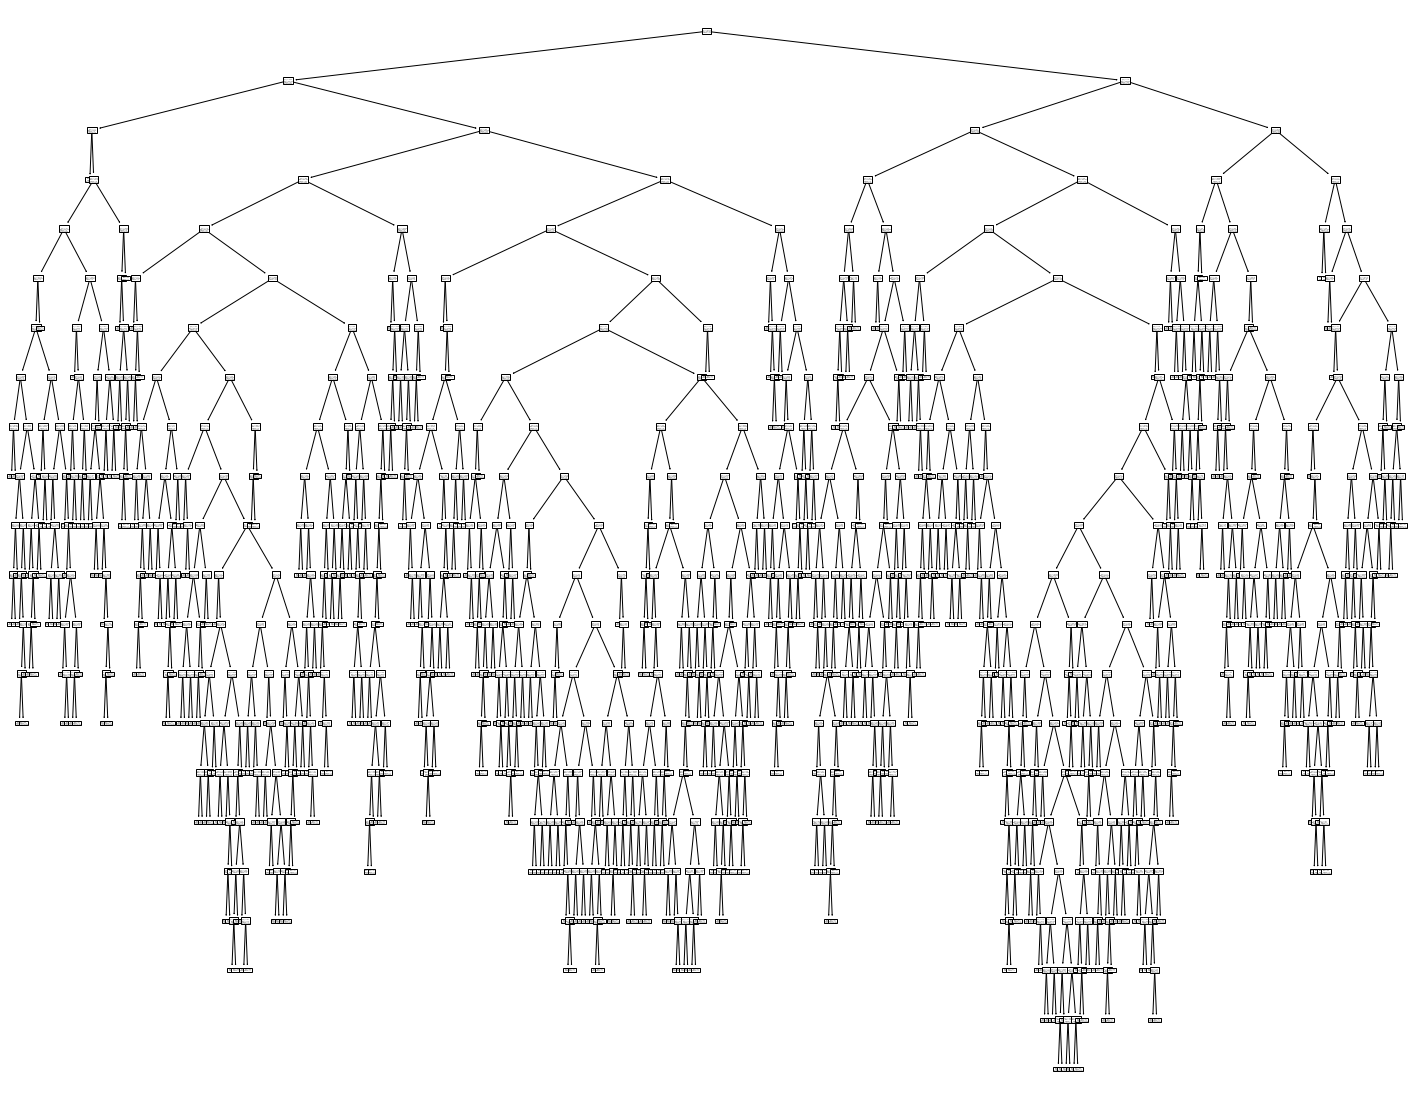

In [15]:
fig=plt.figure(figsize=(25,20))
tree.plot_tree(dtree)

In [16]:
prediction=dtree.predict(X_test)

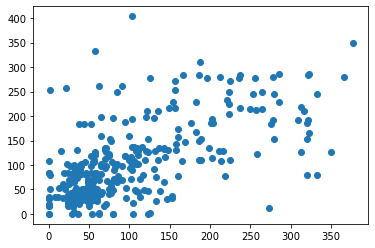

In [17]:
## scatterplot

plt.scatter(y_test,prediction)

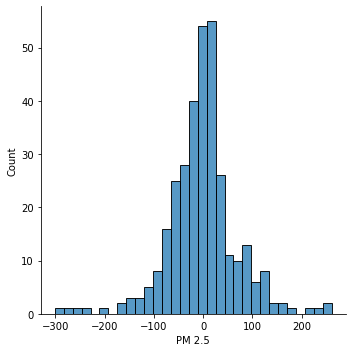

In [18]:
## distplot

sns.displot(y_test-prediction)

### Hyperparameter tuning

In [21]:
parameters={
    'splitter':['best','random'],
    'max_depth':[3,4,5,6,8,10,15,20],
    'min_samples_leaf':[1,2,3,4,5],
    'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4],
    'max_features':['auto','log2','sqrt',None],
    'max_leaf_nodes':[None,10,20,30,50,60,70]
}

In [22]:
## Using RAndomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [24]:
random_score=GridSearchCV(dtree,param_grid=parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [25]:
from datetime import datetime

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print('\n Time taken: %i hours %i minutes and %s seconds.'% (thour,tmin,round(tsec,2)))

In [27]:
start_time=timer(None)
random_score.fit(X,y)
timer(start_time)

Fitting 10 folds for each of 8960 candidates, totalling 89600 fits


C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [28]:
random_score.best_params_

{'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 3,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [29]:
random_score.best_score_

-3403.9164054002786

In [30]:
prediction=random_score.predict(X_test)

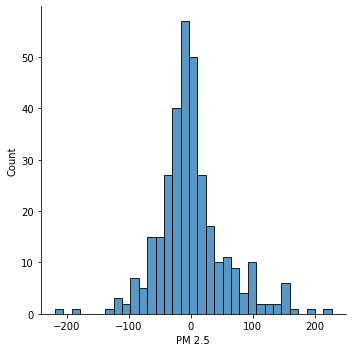

In [31]:
sns.displot(y_test-prediction)